In [16]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_binary_classification_data.csv')
df


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
# Define selected features and target variable
features = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
            'Fruits', 'Veggies', 'DiffWalk', 'BMI', 'GenHlth', 'PhysHlth', 'Age', 'Income']
X = df[features]
y = df['Diabetes_binary']

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Model Training and Classification Report

##### Model 1 - Logistic Regression

In [7]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_prob = logistic_model.predict_proba(X_test)[:, 1]
logistic_cm = confusion_matrix(y_test, logistic_pred)
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_prob)
logistic_auc = auc(logistic_fpr, logistic_tpr)

Text(114.0, 0.5, 'Actual')

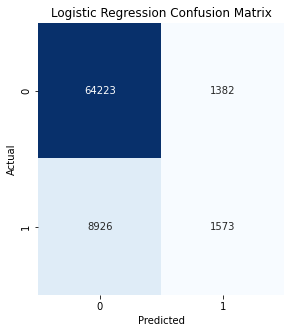

In [10]:
# Plot Confusion Matrices
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [17]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.53      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.71      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



##### Model 2 - Support Vector Machine

In [8]:
# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_prob = svm_model.predict_proba(X_test)[:, 1]
svm_cm = confusion_matrix(y_test, svm_pred)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)
svm_auc = auc(svm_fpr, svm_tpr)

Text(151.16470588235296, 0.5, 'Actual')

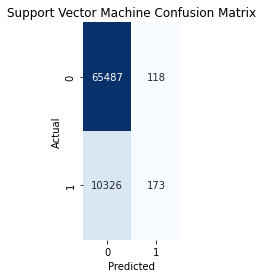

In [11]:
plt.subplot(1, 3, 2)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [18]:
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_pred))

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     65605
         1.0       0.59      0.02      0.03     10499

    accuracy                           0.86     76104
   macro avg       0.73      0.51      0.48     76104
weighted avg       0.83      0.86      0.80     76104



##### Model 3 - Decision Tree

In [9]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_prob = decision_tree_model.predict_proba(X_test)[:, 1]
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_prob)
decision_tree_auc = auc(decision_tree_fpr, decision_tree_tpr)

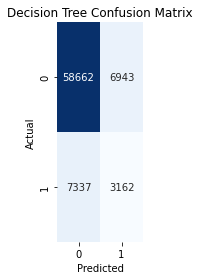

In [13]:
plt.subplot(1, 3, 3)
sns.heatmap(decision_tree_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [19]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     65605
         1.0       0.31      0.30      0.31     10499

    accuracy                           0.81     76104
   macro avg       0.60      0.60      0.60     76104
weighted avg       0.81      0.81      0.81     76104



#### ROC Curve Comparison

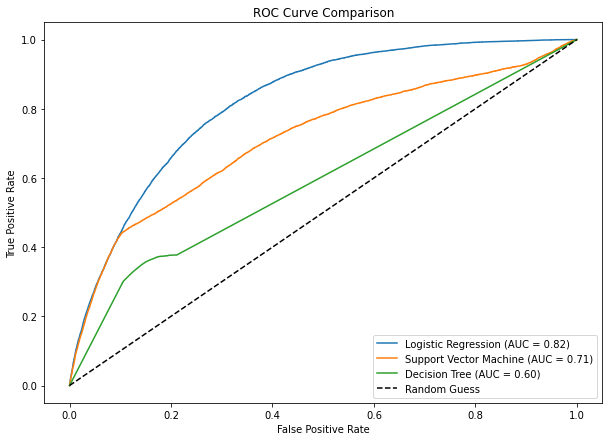

In [14]:
# Plot ROC Curves
plt.figure(figsize=(10, 7))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'Support Vector Machine (AUC = {svm_auc:.2f})')
plt.plot(decision_tree_fpr, decision_tree_tpr, label=f'Decision Tree (AUC = {decision_tree_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()